In [1]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import model_from_json
import numpy
import os
# fix random seed for reproducibility
numpy.random.seed(7)

# load pima indians dataset

import matplotlib.pyplot as plt
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv('pima-indians-diabetes.data.csv', names=col_names)
# # load pima indians dataset
# dataset = numpy.loadtxt("pima-indians-diabetes.data.csv", delimiter=",")

# selection of relevant features
label = df['label']
df.drop('label', axis=1, inplace=True)

X, Y = df, label
df.describe()

# normalized data
df_norm = (df - df.mean()) / (df.max() - df.min())
df_norm.describe()


Using TensorFlow backend.


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-1.561251e-17,-2.312965e-18,3.035766e-18,1.098658e-17,-2.891206e-18,3.472338e-16,2.688821e-16,3.729655e-17
std,1.982105e-01,1.606664e-01,1.586542e-01,1.611335e-01,1.362222e-01,1.174987e-01,1.414725e-01,1.960039e-01
min,-2.261795e-01,-6.075102e-01,-5.664383e-01,-2.074390e-01,-9.432563e-02,-4.767895e-01,-1.681795e-01,-2.040148e-01
25%,-1.673560e-01,-1.100228e-01,-5.824155e-02,-2.074390e-01,-9.432563e-02,-6.993410e-02,-9.740662e-02,-1.540148e-01
50%,-4.970895e-02,-1.957051e-02,2.372567e-02,2.488426e-02,-5.827362e-02,1.106092e-04,-4.243224e-02,-7.068142e-02
75%,1.267616e-01,9.726366e-02,8.929944e-02,1.157934e-01,5.608809e-02,6.866501e-02,6.591533e-02,1.293186e-01
max,7.738205e-01,3.924898e-01,4.335617e-01,7.925610e-01,9.056744e-01,5.232105e-01,8.318205e-01,7.959852e-01


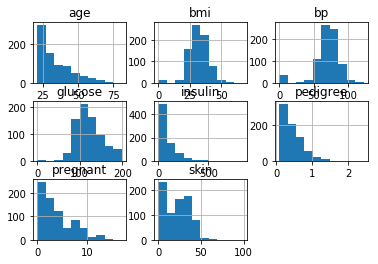

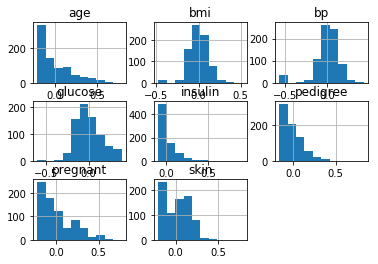

In [2]:
df.hist()
plt.show()

df_norm.hist()
plt.show()

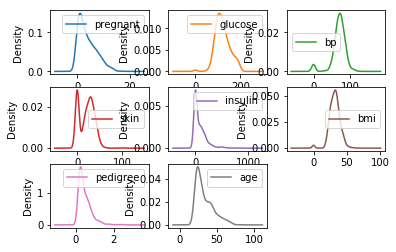

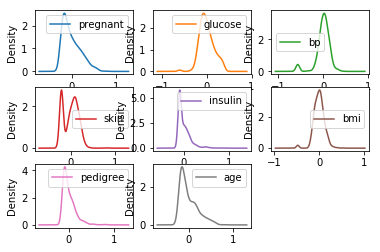

In [3]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()
df_norm.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

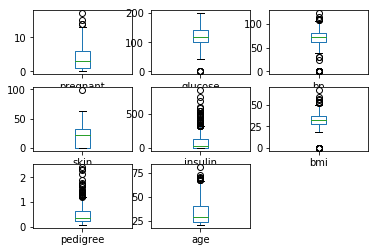

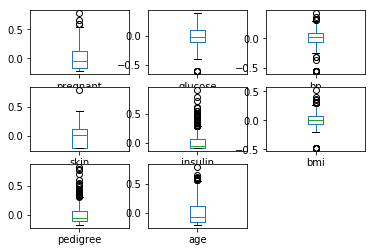

In [4]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()
df_norm.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

In [5]:
df.corr()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


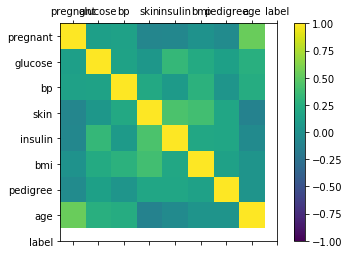

In [6]:
correlations = df.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(col_names)
ax.set_yticklabels(col_names)
plt.show()

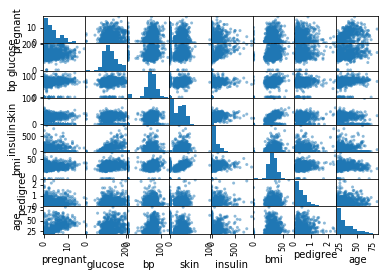

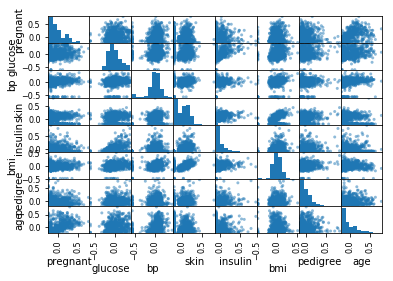

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()
scatter_matrix(df_norm)
plt.show()

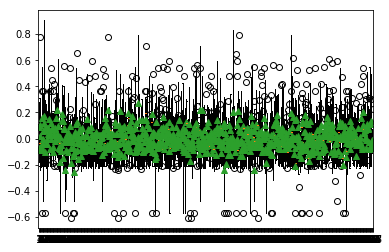

In [16]:
plt.boxplot(df_norm, showmeans=True)
plt.show()

In [17]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier,test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'v', '^', 'o')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                    alpha=1.0, linewidth=1, marker='v',
                    s=55, label='test set')

In [18]:
X = df[['glucose','bmi']]

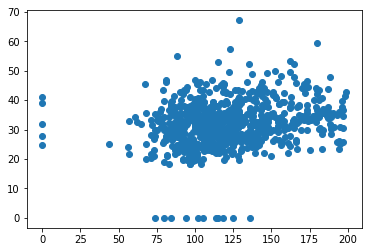

In [21]:
plt.scatter(df['glucose'],df['bmi'])
plt.show()
